In [1]:
from xdesign import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.interpolation as sni

SMALL_SIZE = 8
MEDIUM_SIZE = 8
BIGGER_SIZE = 8

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Validating coverage approximation function

In order to calculate procedure coverage we are using an approximation which uses a Riemann sum to approximate the intersection of each pixel in the coverage map and the beam. We need to determine how the size of Riemann rectangles affects the uncertainty of the coverage map.

## Methods

We will change the number of Riemann rectangles per voxel and view the effect on the coverage magnitude of the uniformly covered region in the center of the field of view.

In [2]:
def circle_density(x, y, radius):
    """Return True for (x,y) contained by the circle with given radius"""
    return x**2 + y**2 <= radius**2

def get_mask(A):
    """Return a boolean mask for dimensions 0 & 1 of A"""
    assert A.shape[0] == A.shape[1]
    radius = A.shape[1] / 2.0 - 1
    coords = np.arange(A.shape[1]) - A.shape[1] / 2.0 + 0.5,
    x, y = np.meshgrid(coords, coords)
    mask = circle_density(x, y, radius)
    return mask

In [3]:
num_angles = 127
theta, h, v = np.meshgrid(np.linspace(0, np.pi, num_angles, endpoint=False),
                          np.linspace(-0.5, 0.5, 32, endpoint=False) + 1/32/2,
                          [0])

In [4]:
coverage_map = coverage_approx(gmin=[-0.5, -0.5], gsize=[1, 1], ngrid=[32, 32],
                               probe_size=1/32, theta=theta, h=h, v=v)

In [5]:
mask = get_mask(coverage_map)
mask.shape

(32, 32)

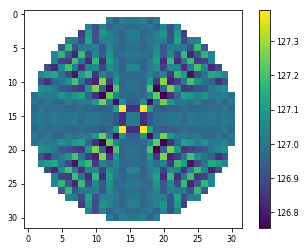

In [6]:
cm = coverage_map[...,0]
cm[~mask] = np.nan
plt.figure()
plt.imshow(cm)
plt.colorbar()
plt.show()

# Actual Experiment

In [7]:
# Choose the range to test each parameter
num_riemann = np.arange(1,32)
means = np.full([len(num_riemann)], np.nan)
std = np.full([len(num_riemann)], np.nan)

In [8]:
# Generate the data. It may already exist in /data/validation
for A in range(len(num_riemann)):

    coverage_map = coverage_approx(gmin=[-0.5, -0.5], gsize=[1, 1], ngrid=[32, 32],
                                   probe_size=1/32, theta=theta, h=h, v=v,
                                   num_rays=num_riemann[A])
    
    cm = coverage_map[...,0]
    cm[~mask] = np.nan

    error = (coverage_map - num_angles) / num_angles
    means[A] = np.nanmean(error)
    std[A] = np.nanstd(error)
    print(means[A], std[A])
    
np.save('./data/new_coverage_validation_means', means)
np.save('./data/new_coverage_validation_std', std)

-9.81351689127e-06 0.0125100121727
-9.81351689105e-06 0.0125100121727
-4.39441315151e-05 0.00482299167793
-6.18724310235e-06 0.00350126480853
-6.72854894459e-06 0.00272269923454
-3.08881259028e-06 0.00215535902661
-1.15079939521e-05 0.00188111560697
-4.85351443951e-07 0.00159313246783
-3.76128579742e-06 0.00139827059323
1.12415991013e-06 0.00129864686531
-7.44691654888e-07 0.00114078449431
-4.93517189334e-06 0.0010568603013
-1.70814227464e-06 0.000958237196966
-7.12966891338e-07 0.000894178196726
-4.51863006048e-07 0.000846883081471
-1.77494520771e-06 0.000785174833573
-4.86109946122e-07 0.000742766323731
5.20953120815e-07 0.000697993374354
-7.58813369589e-07 0.00066542020353
-1.40722428908e-06 0.000630263603629
-3.30313391498e-07 0.000584050132435
-6.53088114149e-07 0.000572592001369
-1.50174544555e-06 0.000544466409819
-4.85522934119e-07 0.000524606935617
-3.56531127647e-07 0.000502904301205
-3.77291121129e-07 0.000486990755962
-1.02658364319e-06 0.000465206058599
-1.52487620951e-08 

# Plot the results

## Draw a Riemann sum figure

Draw a schmatic of the Riemann appoximation used for the coverage function.

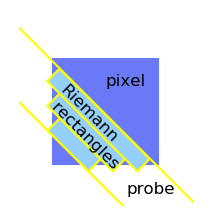

In [77]:
def Riemann_model():
    import matplotlib.patches as patch

    axis = plt.gca()

    pixel = patch.Rectangle([.2,.2], .6, .6, fill=True, color='#6a79f7')
    axis.add_patch(pixel)

    pixel = patch.Rectangle([.4,.16], .1, .33, angle=45, fill=True, facecolor='#95d0fc', edgecolor='yellow')
    axis.add_patch(pixel)

    pixel = patch.Rectangle([.54,.16], .1, .53, angle=45, fill=True, facecolor='#95d0fc', edgecolor='yellow')
    axis.add_patch(pixel)

    pixel = patch.Rectangle([.68,.16], .1, .73, angle=45, fill=True, facecolor='#95d0fc', edgecolor='yellow')
    axis.add_patch(pixel)

    pixel = patch.Rectangle([.96,-.4], .3, 3, angle=45, fill=False, color='yellow')
    axis.add_patch(pixel)

    plt.annotate('pixel', (0.5, 0.65), xycoords='data')
    plt.annotate('probe', (0.62, 0.03), xycoords='data')
    plt.annotate('Riemann\n rectangles', (0.15, 0.5), xycoords='data', rotation=-45)
    
    plt.axis('equal')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.yticks([])
    plt.xticks([])
    plt.axis('off')
    
f = plt.figure(figsize=(8.4/2.54, 8.4/2.54/2), dpi=150)

plt.subplot(121)
Riemann_model()
plt.show()

## Plot validation results

In [73]:
means = np.load('./data/new_coverage_validation_means.npy')
std = np.load('./data/new_coverage_validation_std.npy')

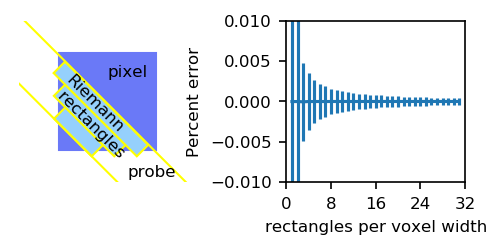

In [83]:
f = plt.figure(figsize=(8.4/2.54, 8.4/2.54/2), dpi=150)

plt.subplot(121)
Riemann_model()

plt.subplot(122)
plt.errorbar(x=num_riemann, y=means, yerr=std)
plt.xlabel('rectangles per voxel width')
plt.ylabel('Percent error')
plt.xlim([0, 32])
plt.xticks([0, 8, 16, 24, 32])
plt.ylim([-0.01, 0.01])

# plt.tight_layout()
# plt.savefig('./figures/validation/{}_coverage_validation.png'.format(A_range[A]), format='png',
#         transparent=True, bbox_inches=None, pad_inches=0, dpi=600,
#         frameon=False)

plt.subplots_adjust(wspace=0.5, hspace=0.4, top=0.90, bottom=0.25, left=0.05, right=0.95)

plt.savefig('./figures/coverage_validation.pdf', dpi=600)
plt.savefig('./figures/coverage_validation.png', dpi=600)

plt.show()